In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc



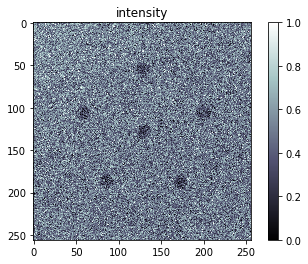

<Figure size 432x288 with 0 Axes>

In [3]:
# Load projection data from file. It is a 250 micro thick Teflon plate. Note
# that this data is already flatfield-corrected!

#proj = np.rot90(np.genfromtxt('RAW.txt'),1)
#proj = np.load('proj.npy')
Sample = np.genfromtxt('AgMo.txt')
#FF = np.genfromtxt('8e8_inline/FF_All.txt')

Corr = Sample #/FF


# Look at the data. You can see the edge-enhanced borders at the transition
# from Teflon to air. In addition, the absorbing properties of the Teflon plate
# are visible. Note that the background-values are around 1.

plt.figure()
plt.title('intensity')
plt.imshow(Corr, cmap='bone', interpolation='none')
plt.colorbar()

# Also plot a line profile through the middle row.

def PI(name):
    P=np.zeros(256)
    for i in range(len(name)):
        P=P+name[i,:]
    mean=P/len(name)
    return mean

plt.figure()
#plt.plot(proj[proj.shape[0]//2][:])



# The parameters of the setup that influence the image formation process are
# specified below.

#pixel_size = .964e-6
#distance = 8.57e-3

pixel_size = 55e-6
distance = 1.2

#mu = 691.
#delta = 2.6e-6

# As Paganin assumes a single material which has to be know beforehand, we look
# up the absorption index and the decrement of the real part of the complex
# refractive index in some database for the given energy. I do that for you.

#trioxide data Ag Mo filter
mu = 393
delta = 1.107e-6
E = 26.58
#mu = 295.
#delta = 3.91e-9
gamma = 770.3
E_J=E*1.6*(10**(-16))
h=10**(-34)
c=3*(10**(8))
k=E_J/(h*c)


In [27]:
#plt.hist(np.ravel(Corr), bins=30 , range = (0,30))

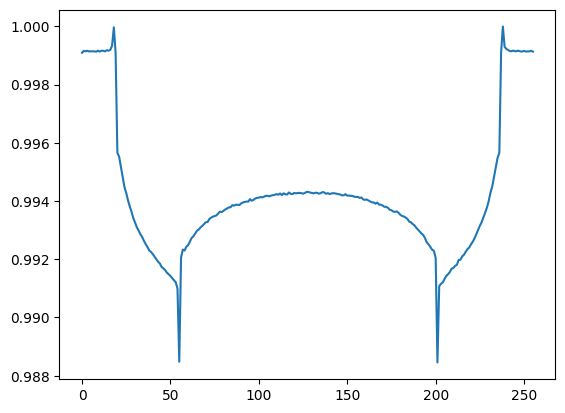

In [18]:
mean = PI(Corr)
plt.plot(mean)

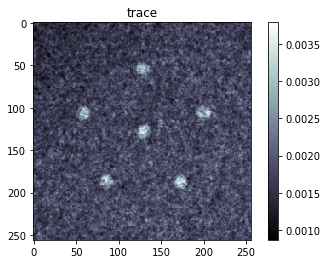

In [4]:
# I help you with creating the frequencies that correspond to the different
# parts of the Fourier image according to our convention.

v = 2. * np.pi * np.fft.fftfreq(Corr.shape[0], d=pixel_size)
u = 2. * np.pi * np.fft.fftfreq(Corr.shape[1], d=pixel_size)
ky, kx = np.meshgrid(v, u, indexing='ij')

# Build the Paganin kernel. Its representation was discussed in the lecture.
w = pixel_size
discrete_space = -2*(np.cos(w*kx)+ np.cos(w*ky)-2)/w**2

Paganin = (1/(distance*(delta/mu)*(kx**2 + ky**2) + 1))  

#Paganin = (1/(distance*(delta/mu)*(discrete_space) + 1))

# Recover the thickness from the projection by applying the Paganin kernel onto
# the intensity measurement.


trace = np.multiply(np.divide(-1, mu), np.log(np.fft.ifft2(np.multiply(Paganin, np.fft.fft2(Corr)))))

# Plot the recovered thickness of the sample in microns. Also plot a line
# through the center row of the trace. Check if the retrieved thickness matches
# the stated thickness in the beginning of our exercise.
#traceN=(trace-np.min(trace))/(np.max(trace)-np.min(trace))
plt.figure()
plt.title('trace')
#plt.imshow(np.real(traceN), cmap='bone', interpolation='none')
plt.imshow(np.real(trace), cmap='bone', interpolation='none')
plt.colorbar()
#plt.savefig('SAMPLE_1e8_events.png')

/home/cristian/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


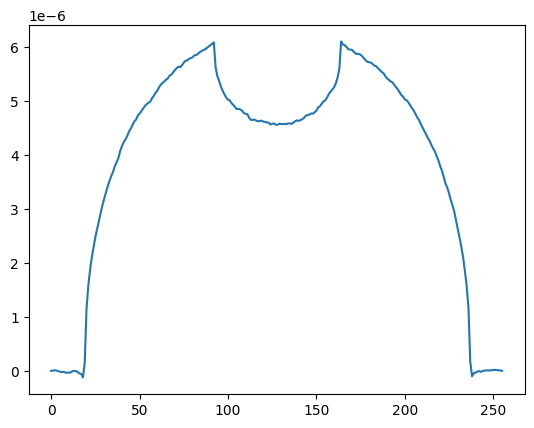

In [67]:

#plt.figure()
#plt.plot((trace[trace.shape[0]//2][:])*np.power(10, 6))
mean1 = PI(trace)
plt.plot(mean1)

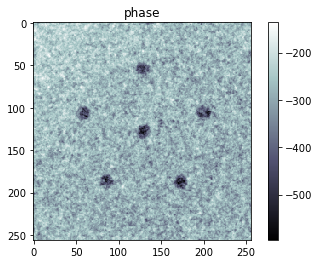

In [7]:
Phase = -k*delta*trace
plt.figure()
plt.title('phase')
plt.imshow(np.real(Phase), cmap='bone', interpolation='none')
plt.colorbar()
#plt.colorbar()
#plt.savefig('Continuo_PM.png')
#np.savetxt('1.8e9_inline/PM_inline_18e9_Discret.txt',np.real(Phase))


/home/cristian/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


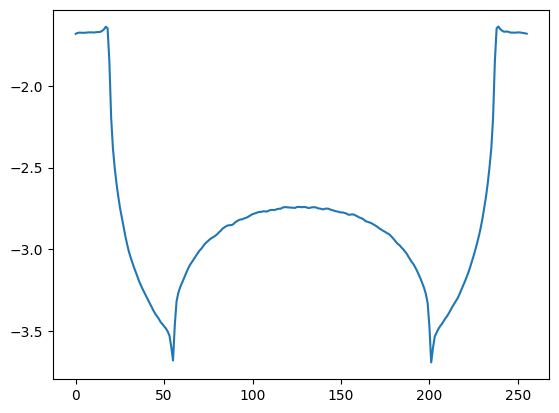

In [13]:
PM = PI(Phase)
plt.plot(PM)

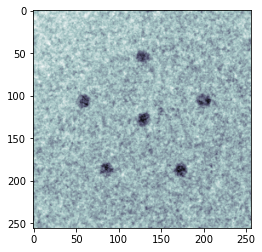

In [12]:
absorption = - Corr + np.real(Phase)
plt.imshow(absorption, cmap='bone')